In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import netCDF4 as nc4
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, FixedLocator, FixedFormatter,
                               NullLocator)

In [15]:
dirt = "/gpfswork/rech/omr/ukd13rj/nemo/penalnemov4.0.1/tests/penaloverflow/exp_up1zps/"

simu = ["nofric_min_phimin1_smo0",
        "nofric_min_phimin05_smo0",
        "nofric_min_phimin01_smo0",
        "nofric_min_phimin001_smo0"]

title = [r"$\phi_{min}=0.1$",
         r"$\phi_{min}=0.05$",
         r"$\phi_{min}=0.01$",
         r"$\phi_{min}=0.001$"]

refsimu = "../exp_up1/tup1_uup1_zps"

NI = len(simu)
#NI=4

pdt = "/OVF_grid_T.nc"

distrib = True
save = 1 
dpi = 400 
psave="bathy_phimin.png"

pname = dirt+refsimu+pdt
dt = nc4.Dataset(pname)
reftheta = np.ma.masked_outside(dt.variables['thetao_inst'][0,:,1,1:201], 10,20) 
tmask = reftheta.mask
e3t = np.ma.masked_where(tmask==1, dt.variables['e3t_inst'][0,:,1,1:201] ) 
h0x = np.nansum(np.ma.filled(e3t,0.),axis=0)
gridx = np.arange(1.5,201.5,1)

hf = 500. + 0.5 * 1500. * ( 1.0 + np.tanh( (gridx - 40.) / 7. ) )
hf[0] = 0. ; hf[-1]=0.

def fdiff(a,b,n=0):
    if n==0 : return(a-b)
    elif (n==1) : return(np.abs(a-b)/b)
    elif (n==-1) : return(a)

nofric_min_phimin1_smo0
nofric_min_phimin05_smo0
nofric_min_phimin01_smo0
nofric_min_phimin001_smo0


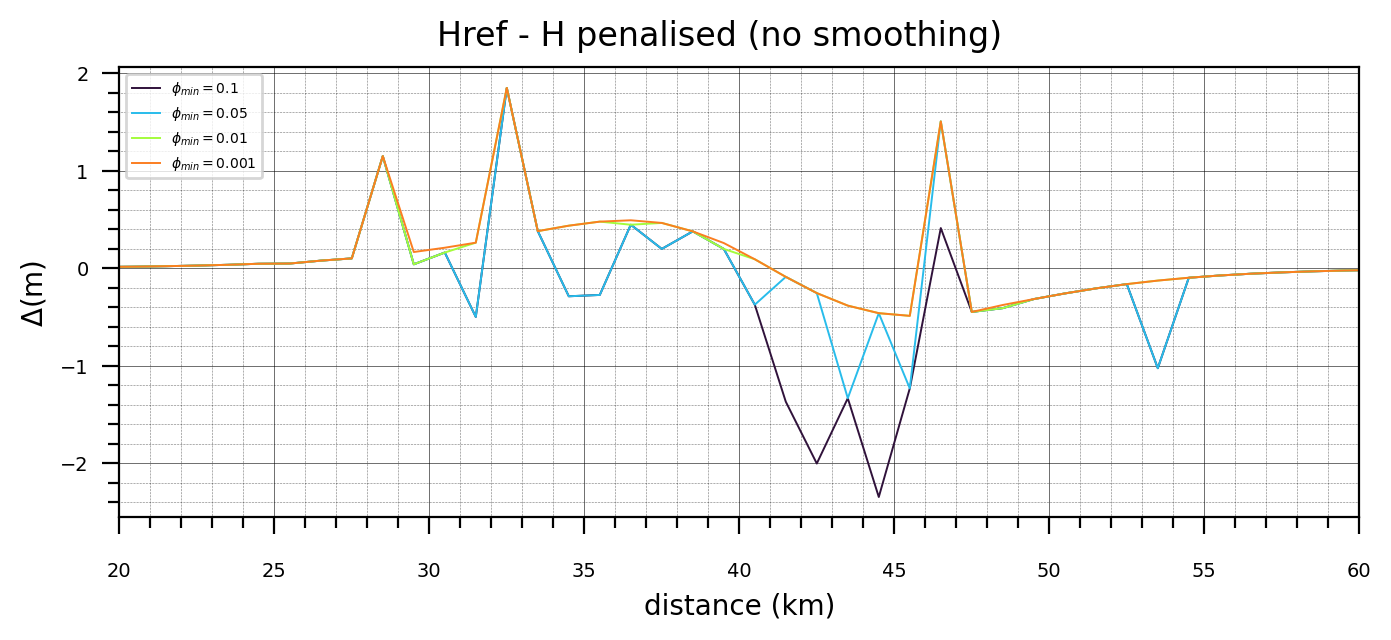

saving : bathy_phimin.png


In [16]:
fig, ax = plt.subplots(figsize=(8,3), dpi=200)
palette = plt.get_cmap('turbo',NI+1)
line = dict(linewidth=0.7, alpha=1.) 

#%matplotlib inline

for i in range(NI):
#for i in range(NI-1,-1,-1):
    #
    pname   = dirt+simu[i]+pdt
    print(simu[i])
    try:
        dt = nc4.Dataset(pname)
    except :
        print(j,i,simu[i],"non existing")
        continue
    reftheta = np.ma.masked_outside(dt.variables['thetao_inst'][0,:,1,1:201], 10,20) 
    tmask = reftheta.mask
    e3t = np.ma.masked_where(tmask==1, dt.variables['e3t_inst'][0,:,1,1:201] ) 
    hx  = np.nansum(np.ma.filled(e3t,0.),axis=0)
    ax.plot(gridx, fdiff(hx,h0x),
            label="%s" % title[i],
            color = palette(i),**line)

ax.grid(which='major', linestyle='-', linewidth=0.2, color='black')
ax.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "y", which = 'both', width=0.8, labelsize = 7, pad = 5)
ax.tick_params(axis = 'x', which = 'both', width=0.8, labelsize = 7, pad = 10)
ax.tick_params(which='minor',length = 4)
ax.tick_params(which='major',length = 6)

ax.set_xlim(20,60)
ax.set_xlabel("distance (km)")
#ax.set_ylim(-3,3)
ax.set_ylabel(r"$\Delta$(m)")

ax.legend(loc=2, fontsize=5)
fig.add_subplot(ax)
plt.suptitle("Href - H penalised (no smoothing)")
fig.subplots_adjust(top = 0.9, bottom=0.15, hspace = 0.02)

#ax.plot(gridx, fdiff(h0x,hf),'--',
#            label="%s" % refsimu,
#            color = "black",**line)

#ax.plot(gridx, hf,'--', color = "red",**line)

plt.show()
print("saving : %s" % psave)
fig.savefig(psave, dpi = dpi)
#plt.close()


---
---
---

In [9]:
dirt = "/gpfswork/rech/omr/ukd13rj/nemo/penalnemov4.0.1/tests/penaloverflow/exp_up1zps/"

simu = ["min_phimin01_smo0",
        "min_phimin01_smo1",
        "min_phimin01_smo2",
        "min_phimin01_smo3",
        "min_phimin01_smo4"]

refsimu = "../exp_up1/tup1_uup1_zps"

NI = len(simu)
#NI=4

pdt = "/OVF_grid_T.nc"

distrib = True
save = 1 
dpi = 400 
psave="bathy_smo.png"

pname = dirt+refsimu+pdt
dt = nc4.Dataset(pname)
reftheta = np.ma.masked_outside(dt.variables['thetao_inst'][0,:,1,1:201], 10,20) 
tmask = reftheta.mask
e3t = np.ma.masked_where(tmask==1, dt.variables['e3t_inst'][0,:,1,1:201] ) 
h0x = np.nansum(np.ma.filled(e3t,0.),axis=0)
gridx = np.arange(1.5,201.5,1)

hf = 500. + 0.5 * 1500. * ( 1.0 + np.tanh( (gridx - 40.) / 7. ) )
hf[0] = 0. ; hf[-1]=0.

def fdiff(a,b,n=0):
    if n==0 : return(a-b)
    elif (n==1) : return(np.abs(a-b)/b)
    elif (n==-1) : return(a)

min_phimin01_smo0
min_phimin01_smo1
min_phimin01_smo2
min_phimin01_smo3
min_phimin01_smo4


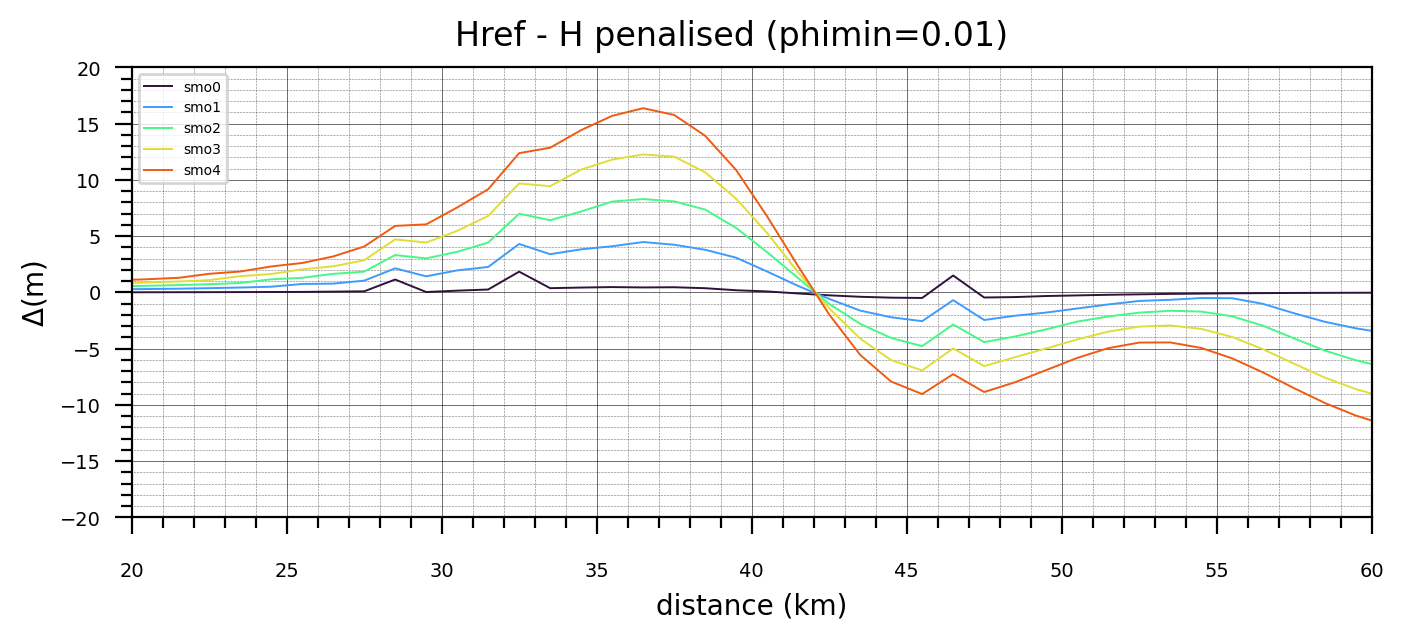

saving : bathy_smo.png


In [12]:
fig, ax = plt.subplots(figsize=(8,3), dpi=200)
palette = plt.get_cmap('turbo',NI+1)
line = dict(linewidth=0.7, alpha=1.) 

#%matplotlib inline

for i in range(NI):
#for i in range(NI-1,-1,-1):
    #
    pname   = dirt+simu[i]+pdt
    print(simu[i])
    try:
        dt = nc4.Dataset(pname)
    except :
        print(j,i,simu[i],"non existing")
        continue
    reftheta = np.ma.masked_outside(dt.variables['thetao_inst'][0,:,1,1:201], 10,20) 
    tmask = reftheta.mask
    e3t = np.ma.masked_where(tmask==1, dt.variables['e3t_inst'][0,:,1,1:201] ) 
    hx  = np.nansum(np.ma.filled(e3t,0.),axis=0)
    ax.plot(gridx, fdiff(hx,h0x),
            label="%s" % simu[i].split("_")[-1],
            color = palette(i),**line)

ax.grid(which='major', linestyle='-', linewidth=0.2, color='black')
ax.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "y", which = 'both', width=0.8, labelsize = 7, pad = 5)
ax.tick_params(axis = 'x', which = 'both', width=0.8, labelsize = 7, pad = 10)
ax.tick_params(which='minor',length = 4)
ax.tick_params(which='major',length = 6)

ax.set_xlim(20,60)
ax.set_xlabel("distance (km)")
ax.set_ylim(-20,20)
ax.set_ylabel(r"$\Delta$(m)")

ax.legend(loc=2, fontsize=5)
fig.add_subplot(ax)
plt.suptitle("Href - H penalised (phimin=0.01)")
fig.subplots_adjust(top = 0.9, bottom=0.15, hspace = 0.02)

#ax.plot(gridx, fdiff(h0x,hf),'--',
#            label="%s" % refsimu,
#            color = "black",**line)

#ax.plot(gridx, hf,'--', color = "red",**line)
plt.show()
print("saving : %s" % psave)
fig.savefig(psave, dpi = dpi)
#plt.close()

In [142]:
h0x

array([ 500.     ,  500.     ,  500.     ,  500.     ,  500.     ,
        500.     ,  500.     ,  500.     ,  500.     ,  500.     ,
        500.     ,  500.     ,  500.     ,  500.     ,  500.     ,
        500.     ,  500.     ,  502.41824,  503.21625,  504.2769 ,
        505.6859 ,  507.55685,  510.03928,  513.3299 ,  517.6863 ,
        523.4439 ,  531.0367 ,  540.     ,  554.0968 ,  571.1388 ,
        593.2034 ,  620.     ,  657.50085,  702.5546 ,  758.0192 ,
        824.86865,  903.4121 ,  992.9788 , 1091.7013 , 1196.5195 ,
       1303.4805 , 1408.2987 , 1507.0212 , 1596.5879 , 1675.1313 ,
       1740.     , 1797.4453 , 1842.4991 , 1878.4703 , 1906.7965 ,
       1928.8612 , 1945.9032 , 1958.9799 , 1968.9634 , 1976.5562 ,
       1982.3137 , 1986.6702 , 1989.9607 , 1992.4431 , 1994.3141 ,
       1995.7231 , 1996.7837 , 1997.5818 , 1998.182  , 1998.6334 ,
       1998.9728 , 1999.2279 , 1999.4198 , 1999.564  , 1999.6722 ,
       1999.7537 , 1999.815  , 1999.861  , 1999.8955 , 1999.92

In [143]:
hx

array([ 431.67722,  459.02338,  486.37357,  498.10318,  500.07227,
        500.0935 ,  500.1218 ,  500.1594 ,  500.20947,  500.2761 ,
        500.36472,  500.4826 ,  500.6395 ,  500.84824,  501.1258 ,
        501.4951 ,  501.98608,  502.6389 ,  503.5066 ,  504.6594 ,
        506.1922 ,  508.22342,  510.9163 ,  514.4838 ,  519.19946,
        525.4199 ,  533.60254,  544.3275 ,  558.32043,  576.4652 ,
        599.8071 ,  629.54065,  666.94507,  713.28723,  769.646  ,
        836.6973 ,  914.46265, 1002.092  , 1097.7482 , 1198.6672 ,
       1301.4222 , 1402.34   , 1497.9928 , 1585.6171 , 1663.3754 ,
       1730.4196 , 1786.7697 , 1833.1003 , 1870.4835 , 1900.1466 ,
       1923.2919 , 1940.9955 , 1954.2035 , 1963.7742 , 1970.4832 ,
       1975.018  , 1977.9994 , 1979.9733 , 1981.345  , 1982.3491 ,
       1983.1027 , 1983.67   , 1984.0973 , 1984.4187 , 1984.6602 ,
       1984.8419 , 1984.9785 , 1985.0813 , 1985.1586 , 1985.2166 ,
       1985.26   , 1985.293  , 1985.3175 , 1985.3359 , 1985.35